# Assignment 0.1: K-Means Clustring
### Submitted to   Sir. Ahmad Adnan 
### Submitted by  Saira Ali              
##### Reg#: 2021-ag-2209         
##### Degree: MS(SE) 2nd          

### Import Libraries

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Load iris dataset by using seaborn library which we've already imported

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


I've droped petal length,petal width and species columns and name new dataframe as 'df_clean'.

In [4]:

df_clean = df.drop(['survived','pclass','sex','sibsp','parch','embarked','class','who','adult_male','deck','embark_town','alive','alone'],axis=1)
df_clean

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [5]:
df_clean.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [16]:
df_clean.isnull().sum()


age     177
fare      0
dtype: int64

In [17]:
df_clean = df_clean[df_clean['age']>=1]
df_clean.isnull().sum()

age     0
fare    0
dtype: int64

### Scatter plot is ploted between age and fare, to visualise our dataset.

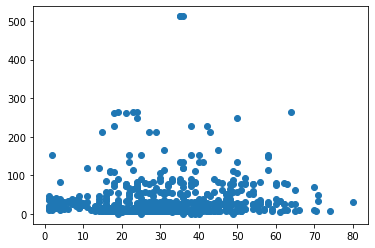

In [18]:
plt.scatter(df_clean['age'],df_clean['fare'])

### for k-mean clustring
#### 1. Start with k centroids by putting them at random place.
####   here k = 3

In [27]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

#### Compute distance of every point from centroid and cluster them accordingly.
#### Here i've used fit_predict to predict our clusters which is 0,1,2 (k=3)

In [28]:
y_predict = km.fit_predict(df_clean[['age','fare']])
y_predict

array([0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 3, 0, 0, 0, 0, 1, 3, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 1, 1, 0,
       3, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       0, 1, 0, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 1, 0,

#### also append cluster into df_clean

In [29]:
df_clean['cluster']= y_predict
df_clean.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21680\2314025494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster']= y_predict


,age,fare,cluster
0,22.0,7.2500,0
1,38.0,71.2833,3
2,26.0,7.9250,0
3,35.0,53.1000,3
4,35.0,8.0500,0


Used cluster_centers_ to findout our centriods 

In [30]:
km.cluster_centers_

array([[ 28.63957597,  16.07192951],
       [ 32.25      , 207.96545   ],
       [ 35.33333333, 512.3292    ],
       [ 36.05263158,  77.94894035]])

## Visualization
#### 1. created new dataframes as per clusters
#### 2. Scatter plot of each cluster
#### 3. Set centroid label and markers
#### 4. X & Y labels Description is given using plt.xlabel and plt.ylabel

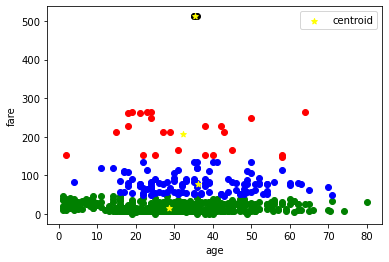

In [32]:
# New dataframes based on cluster
df1= df_clean[df_clean.cluster==0]
df2= df_clean[df_clean.cluster==1]
df3= df_clean[df_clean.cluster==2]
df4= df_clean[df_clean.cluster==3]
# Scatter plot of each cluster
plt.scatter(df1.age,df1['fare'],color ='green')
plt.scatter(df2.age,df2['fare'],color ='red')
plt.scatter(df3.age,df3['fare'],color ='black')
plt.scatter(df4.age,df4['fare'],color ='blue')
# Centroid formatting
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
color = 'yellow',marker='*',label='centroid')
# X & Y label descriptions
plt.xlabel('age')
plt.ylabel('fare')

plt.legend()

#### Use Elbow Technique to find out cluster number or simply k value. 
#### So to apply Elbow technique 
##### First, i've suggested range of k which is between 1-10, SSE(Sum of Square error) is defined as an array. After that for loop will run upto k_rng, in KMeans clusters will be equal to k and SSE will append inertia ok km into SSE array.

In [33]:
#Elbow method to find out K value
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_clean[['age','fare']])
    sse.append(km.inertia_)

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [34]:
sse

[2125709.9324340224,
 905922.5096557452,
 498336.51318366046,
 305750.6157540579,
 228343.3083239626,
 159688.81846484976,
 123242.53362664537,
 107483.36126976449,
 93186.05989139184]

Now, Plot graph between SSE and k_rng
It has a bend like Elbow, which appears at 2 & 3 but most appropriate place is 3 so that is why "k = 3" is most appropriate number for clustering. Although k=2 will also work but 3 will give us bit more clear clusters.

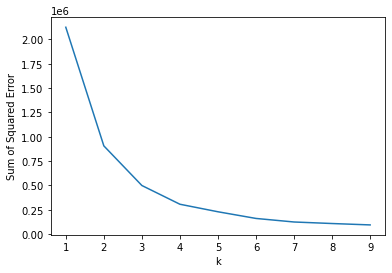

In [35]:
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse)

## Mean
#### Mean is the mathematical average of a set of two or more numbers
**Formula**
```
m = sum of the terms/number of terms
```

In [36]:
from statistics import mean


mean([1,2,3,4,5,6])


3.5

### Median
The middle number; found by ordering all data points and picking out the one in the middle (or if there are two middle numbers, taking the mean of those two numbers)

In [37]:
from statistics import median


median([1,2,3,4,5])

3

In [38]:
# if we have 2number as a median it will calculate thier mean 
# and then take it as a median.
median([1,2,3,4,5,6])

3.5

### Mode
The most frequent number—that is, the number that occurs the highest number of times. Example: The mode of {4 , 2, 4, 3, 2, 2} is 2 because it occurs three times, which is more than any other number.

In [39]:
from statistics import mode


a = mode([1,0,3,8,6,5,4,3,2,3,4,5,6,7,8])
b = mode([1,2,2,3,4,5,6])
c = mode([1,2,3,4,4,5,6,0,1,1])
print (a)
print (b)
print (c)

3
2
1


### What Is Standard Deviation?
Standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance. 

### What Is Variance?
The term variance refers to a statistical measurement of the spread between numbers in a data set. More specifically, variance measures how far each number in the set is from the mean (average), and thus from every other number in the set. Variance is often depicted by this symbol: σ2. It is used by both analysts and traders to determine volatility and market security.

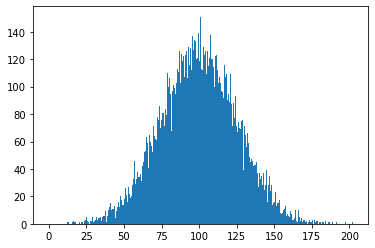

In [43]:
a = np.random.normal(100,25,20000)
plt.hist(a,500)
plt.show()

In [44]:
a.mean()

99.79519624889666

In [45]:
# Nothing but just the square of standard deviation.
a.var()

632.4510083306174

In [46]:
a.std()

25.148578654282183

More than 3 from standard deviation is considered to be outliers(on both sides).


In [47]:
R_outlier= 100+(3*24.99)
L_outlier= 100-(3*24.99)
print('Outliers from Right side of mean:',R_outlier)
print('Outliers from Left side of mean:',L_outlier)

Outliers from Right side of mean: 174.97
Outliers from Left side of mean: 25.03


### CNN & RNN
#### Difference Between CNN and RNN 
| Convolutional Neural Networks | Recurrent Neural Networks | 
| :---- |:----|
| In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery. |A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence.|
| It is suitable for spatial data like images. |RNN is used for temporal data, also called sequential data.|
| CNN is a type of feed-forward artificial neural network with variations of multilayer perceptron’s designed to use minimal amounts of preprocessing. |RNN, unlike feed-forward neural networks- can use their internal memory to process arbitrary sequences of inputs.|
|CNN is considered to be more powerful than RNN.|RNN includes less feature compatibility when compared to CNN.|
|This CNN takes inputs of fixed sizes and generates fixed size outputs.|RNN can handle arbitrary input/output lengths.|
|CNN’s are ideal for images and video processing.|RNNs are ideal for text and speech analysis.|
|Applications include Image Recognition, Image Classification, Medical Image Analysis, Face Detection and Computer Vision.|Applications include Text Translation, Natural Language Processing, Language Translation, Sentiment Analysis and Speech Analysis.|

# PYTHON IMPLEMENTATION: MLXTEND
**Association Rule/ Apriori**
- Mlxtend(machien leaning extension) is a Python library of useful tools for the day-to-day data science tasks.
- from mletend.frequent_patters import apriori
    - Apriori function to extract frequent itemsets for association rule mining
    - Support threshold can be mentioned to retrieve frequent itemset
- from mlxtend.frequent_patterns import association_rules
  - Function to generate association rule from frequent itemset
  - Dataframe, metrics and minimum threshold needed to be mentioned
  - Metric values are: support, confidence,lift

In [48]:
# Dataset for apriori
dataset = [['Oil','Onion','Tomato','Eggs','Yogurt'],
           ['Dill','Onion','Nutmeg','Tomato','Eggs','Yogurt'],
           ['Oil','Apple','Tomato','Eggs'],
           ['Oil','Unicorn','Lotion','Tomato','Yogurt'],
           ['Corn','Onion','Onion','Tomato','Soap','Eggs'] ]

In [49]:
# currently its nothing but just an array 
dataset

[['Oil', 'Onion', 'Tomato', 'Eggs', 'Yogurt'],
 ['Dill', 'Onion', 'Nutmeg', 'Tomato', 'Eggs', 'Yogurt'],
 ['Oil', 'Apple', 'Tomato', 'Eggs'],
 ['Oil', 'Unicorn', 'Lotion', 'Tomato', 'Yogurt'],
 ['Corn', 'Onion', 'Onion', 'Tomato', 'Soap', 'Eggs']]

In [50]:
# Import Library 
from mlxtend.preprocessing import TransactionEncoder

In [51]:
# Transactions are encoded into True/false as per thier presence in specific column
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[False, False, False,  True, False, False,  True,  True, False,
         True, False,  True],
       [False, False,  True,  True, False,  True, False,  True, False,
         True, False,  True],
       [ True, False, False,  True, False, False,  True, False, False,
         True, False, False],
       [False, False, False, False,  True, False,  True, False, False,
         True,  True,  True],
       [False,  True, False,  True, False, False, False,  True,  True,
         True, False, False]])

column names are all possible value available in dataset. and rows (0-4) are numbered as we have provided 4rows data earlier.
if we look at 'dataset' there is apple only in 2nd row that is why its true at row 2 and false on all other rows. similar rule is applied on all items. and generat "df"

In [52]:
 
df = pd.DataFrame(te_ary,columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Lotion,Nutmeg,Oil,Onion,Soap,Tomato,Unicorn,Yogurt
0,False,False,False,True,False,False,True,True,False,True,False,True
1,False,False,True,True,False,True,False,True,False,True,False,True
2,True,False,False,True,False,False,True,False,False,True,False,False
3,False,False,False,False,True,False,True,False,False,True,True,True
4,False,True,False,True,False,False,False,True,True,True,False,False


I've imported apriori using mlxtend.prequent_patterns
Here, i'am generating frequent_items with the help of  apriori and give df as a dataframe, and filterout values who's minimum threshold is 0.6. Use_colnames = True: means we want to see column names, if we use False then it'll show us only column number.  

In [53]:
from mlxtend.frequent_patterns import apriori

frequent_items = apriori(df,min_support=0.6,use_colnames=True)
frequent_items

,support,itemsets
0,0.8,(Eggs)
1,0.6,(Oil)
2,0.6,(Onion)
3,1.0,(Tomato)
4,0.6,(Yogurt)
5,0.6,"(Onion, Eggs)"
6,0.8,"(Tomato, Eggs)"
7,0.6,"(Tomato, Oil)"
8,0.6,"(Tomato, Onion)"
9,0.6,"(Yogurt, Tomato)"


## Association Rule Mining 
- imporing association rule using mlxtend.frequent_patterns 
- calling association_rules function and passing frequent_items, here in matric we could use lift or confidence, its upto you.
- min_threshold = 0.7 means we are filtering out those values which have confidence value morethan 0.7.
- and then print head values
- An association rule has two parts: 
  - an antecedent (if) and 
  - a consequent (then). 
  - An **antecedent** is an item found within the data. 
  - A **consequent** is an item found in combination with the **antecedent**.

**Association rules** are created by searching data for frequent if-then patterns and using the **criteria support and confidence** to identify the most important relationships. 
- **Support** is an indication of how frequently the items appear in the data. 
- **Confidence** indicates the number of times the if-then statements are found true. 
- **A third metric, called lift**, can be used to compare confidence with expected confidence, or how many times an if-then statement is expected to be found true.
- **Leverage** computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent. A leverage value of 0 indicates independence.
- you can use **conviction** to evaluate the directional relationship between your items. Finally, similar to lift, conviction=1 means that items are not associated, while conviction>1 indicates the relationship between the items (the higher the value, the stronger the relationship)

In [54]:
from mlxtend.frequent_patterns import association_rules
res = association_rules(frequent_items,metric='confidence',min_threshold=0.7)
res.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
1,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
2,(Tomato),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
3,(Eggs),(Tomato),0.8,1.0,0.8,1.00,1.00,0.00,inf
4,(Oil),(Tomato),0.6,1.0,0.6,1.00,1.00,0.00,inf


In [55]:
res1 = res[['antecedents','consequents','support','confidence','lift']]
res1.head()

,antecedents,consequents,support,confidence,lift
0,(Onion),(Eggs),0.6,1.00,1.25
1,(Eggs),(Onion),0.6,0.75,1.25
2,(Tomato),(Eggs),0.8,0.80,1.00
3,(Eggs),(Tomato),0.8,1.00,1.00
4,(Oil),(Tomato),0.6,1.00,1.00


In [56]:
res2 = res1[res1['confidence']>=1]
res2

,antecedents,consequents,support,confidence,lift
0,(Onion),(Eggs),0.6,1.0,1.25
3,(Eggs),(Tomato),0.8,1.0,1.00
4,(Oil),(Tomato),0.6,1.0,1.00
5,(Onion),(Tomato),0.6,1.0,1.00
6,(Yogurt),(Tomato),0.6,1.0,1.00
7,"(Tomato, Onion)",(Eggs),0.6,1.0,1.25
9,"(Onion, Eggs)",(Tomato),0.6,1.0,1.00
10,(Onion),"(Tomato, Eggs)",0.6,1.0,1.25
